In [115]:
import pandas as pd
import numpy as np

In [116]:
df = pd.read_csv('C:\\Users\\aman tiwari\\OneDrive\\Desktop\\Pylona_sales.csv')

In [117]:
df.head()

,Month,Jasmine_100,Jasmine_50,Jasmine_200,Jasmine_500,Coconut_40,Coconut_100,Coconut_200,Coconut_500,Amla_50,Amla_100,Amla_200,Amla_500
0,Apr-22,"10,128","4,770","4,590","1,368",624,"4,536","2,688","1,368","1,200","1,944","1,584",504
1,May-22,"6,264","7,248","2,844","1,188","2,496","1,296","1,728","1,296","3,360","1,440",960,648
2,Jun-22,"7,320","6,720","5,322","1,596","5,302","4,968","2,400",756,"2,160","1,584","1,440",648
3,Jul-22,"6,600","6,222","4,460","1,332","3,936","2,592","1,632",936,"2,640","1,872","1,152",360
4,Aug-22,"10,704","7,440","3,354",972,"3,432","3,888","2,688","1,404",720,"2,160","1,248",432


In [118]:
# Convert Month column to datetime
df['Month'] = pd.to_datetime(df['Month'], format="%b-%y")
# Set as index (for time series modeling)
df.set_index('Month', inplace=True)
#'Month' is no longer a column — it becomes the time-based index of the DataFrame.
#used for the modelling

In [119]:
df.head()

,Jasmine_100,Jasmine_50,Jasmine_200,Jasmine_500,Coconut_40,Coconut_100,Coconut_200,Coconut_500,Amla_50,Amla_100,Amla_200,Amla_500
Month,,,,,,,,,,,,
2022-04-01,"10,128","4,770","4,590","1,368",624,"4,536","2,688","1,368","1,200","1,944","1,584",504
2022-05-01,"6,264","7,248","2,844","1,188","2,496","1,296","1,728","1,296","3,360","1,440",960,648
2022-06-01,"7,320","6,720","5,322","1,596","5,302","4,968","2,400",756,"2,160","1,584","1,440",648
2022-07-01,"6,600","6,222","4,460","1,332","3,936","2,592","1,632",936,"2,640","1,872","1,152",360
2022-08-01,"10,704","7,440","3,354",972,"3,432","3,888","2,688","1,404",720,"2,160","1,248",432


In [120]:
print(df.index.is_monotonic_increasing)  
df = df.asfreq('MS') #we are setting frequency in the month index by this code
# pandas doesn’t automatically assume a fixed frequency 
#this means even though our data is set monthly pandas needs to be told that the data is in frequency

print(df.index.freq)

True
<MonthBegin>


In [121]:
df = df.fillna(method='ffill')

C:\Users\aman tiwari\AppData\Local\Temp\ipykernel_22204\569672361.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [122]:
df

,Jasmine_100,Jasmine_50,Jasmine_200,Jasmine_500,Coconut_40,Coconut_100,Coconut_200,Coconut_500,Amla_50,Amla_100,Amla_200,Amla_500
Month,,,,,,,,,,,,
2022-04-01,"10,128","4,770","4,590","1,368",624,"4,536","2,688","1,368","1,200","1,944","1,584",504
2022-05-01,"6,264","7,248","2,844","1,188","2,496","1,296","1,728","1,296","3,360","1,440",960,648
2022-06-01,"7,320","6,720","5,322","1,596","5,302","4,968","2,400",756,"2,160","1,584","1,440",648
2022-07-01,"6,600","6,222","4,460","1,332","3,936","2,592","1,632",936,"2,640","1,872","1,152",360
2022-08-01,"10,704","7,440","3,354",972,"3,432","3,888","2,688","1,404",720,"2,160","1,248",432
2022-09-01,"12,732","10,656","7,254",732,"1,560","4,104","1,920",745,"1,680","1,440","1,320",108
2022-10-01,"8,190","6,294","4,608","1,620","4,368","4,320","2,592","1,512","2,400","1,800","1,248",792
2022-11-01,"11,232","9,840","6,918","1,944","2,496","3,384","2,016",900,"2,640","2,160","1,536",360
2022-12-01,"8,640","9,120","4,128","1,152","2,004","3,024","1,536",864,"1,200","2,016","1,728",504


In [123]:
df = df.replace(',', '', regex=True)  # Remove commas

In [124]:
df 

,Jasmine_100,Jasmine_50,Jasmine_200,Jasmine_500,Coconut_40,Coconut_100,Coconut_200,Coconut_500,Amla_50,Amla_100,Amla_200,Amla_500
Month,,,,,,,,,,,,
2022-04-01,10128,4770,4590,1368,624,4536,2688,1368,1200,1944,1584,504
2022-05-01,6264,7248,2844,1188,2496,1296,1728,1296,3360,1440,960,648
2022-06-01,7320,6720,5322,1596,5302,4968,2400,756,2160,1584,1440,648
2022-07-01,6600,6222,4460,1332,3936,2592,1632,936,2640,1872,1152,360
2022-08-01,10704,7440,3354,972,3432,3888,2688,1404,720,2160,1248,432
2022-09-01,12732,10656,7254,732,1560,4104,1920,745,1680,1440,1320,108
2022-10-01,8190,6294,4608,1620,4368,4320,2592,1512,2400,1800,1248,792
2022-11-01,11232,9840,6918,1944,2496,3384,2016,900,2640,2160,1536,360
2022-12-01,8640,9120,4128,1152,2004,3024,1536,864,1200,2016,1728,504


In [125]:
df = df.apply(pd.to_numeric, errors='coerce')

In [126]:
print(df.dtypes)

Jasmine_100    int64
Jasmine_50     int64
Jasmine_200    int64
Jasmine_500    int64
Coconut_40     int64
Coconut_100    int64
Coconut_200    int64
Coconut_500    int64
Amla_50        int64
Amla_100       int64
Amla_200       int64
Amla_500       int64
dtype: object


In [127]:
df

,Jasmine_100,Jasmine_50,Jasmine_200,Jasmine_500,Coconut_40,Coconut_100,Coconut_200,Coconut_500,Amla_50,Amla_100,Amla_200,Amla_500
Month,,,,,,,,,,,,
2022-04-01,10128,4770,4590,1368,624,4536,2688,1368,1200,1944,1584,504
2022-05-01,6264,7248,2844,1188,2496,1296,1728,1296,3360,1440,960,648
2022-06-01,7320,6720,5322,1596,5302,4968,2400,756,2160,1584,1440,648
2022-07-01,6600,6222,4460,1332,3936,2592,1632,936,2640,1872,1152,360
2022-08-01,10704,7440,3354,972,3432,3888,2688,1404,720,2160,1248,432
2022-09-01,12732,10656,7254,732,1560,4104,1920,745,1680,1440,1320,108
2022-10-01,8190,6294,4608,1620,4368,4320,2592,1512,2400,1800,1248,792
2022-11-01,11232,9840,6918,1944,2496,3384,2016,900,2640,2160,1536,360
2022-12-01,8640,9120,4128,1152,2004,3024,1536,864,1200,2016,1728,504


In [128]:
df = df.interpolate(method='linear', limit_direction='both')

In [129]:
print(df.isna().sum())

Jasmine_100    0
Jasmine_50     0
Jasmine_200    0
Jasmine_500    0
Coconut_40     0
Coconut_100    0
Coconut_200    0
Coconut_500    0
Amla_50        0
Amla_100       0
Amla_200       0
Amla_500       0
dtype: int64


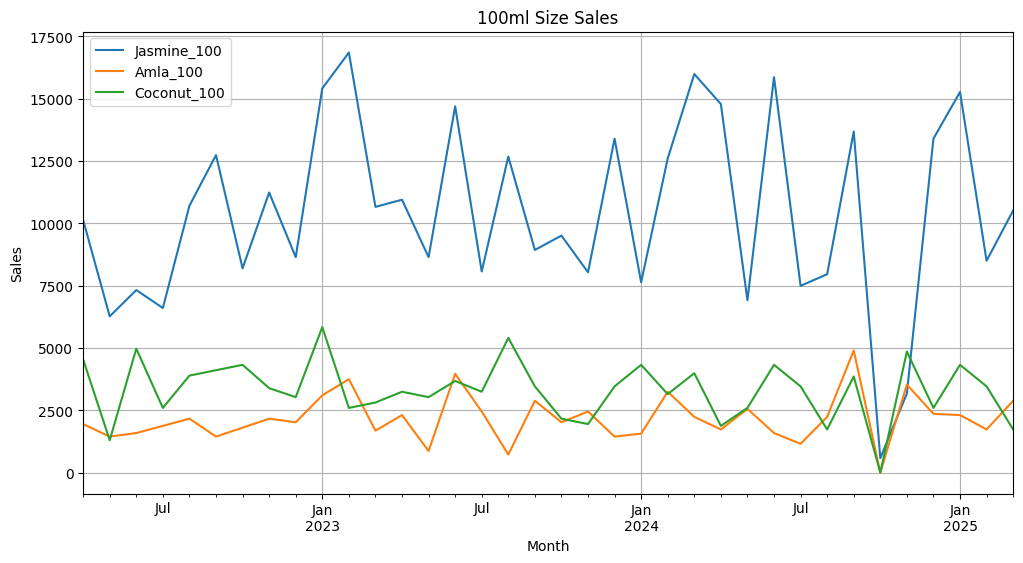

In [130]:
import matplotlib.pyplot as plt
df[['Jasmine_100','Amla_100','Coconut_100']].plot(figsize=(12, 6), title="100ml Size Sales")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

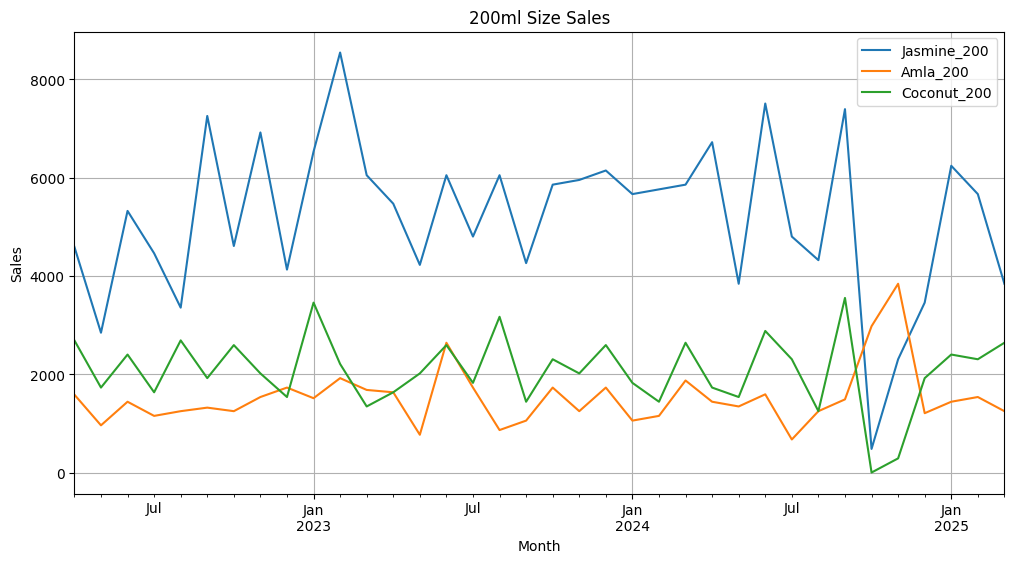

In [131]:
df[['Jasmine_200','Amla_200','Coconut_200']].plot(figsize=(12, 6), title="200ml Size Sales")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

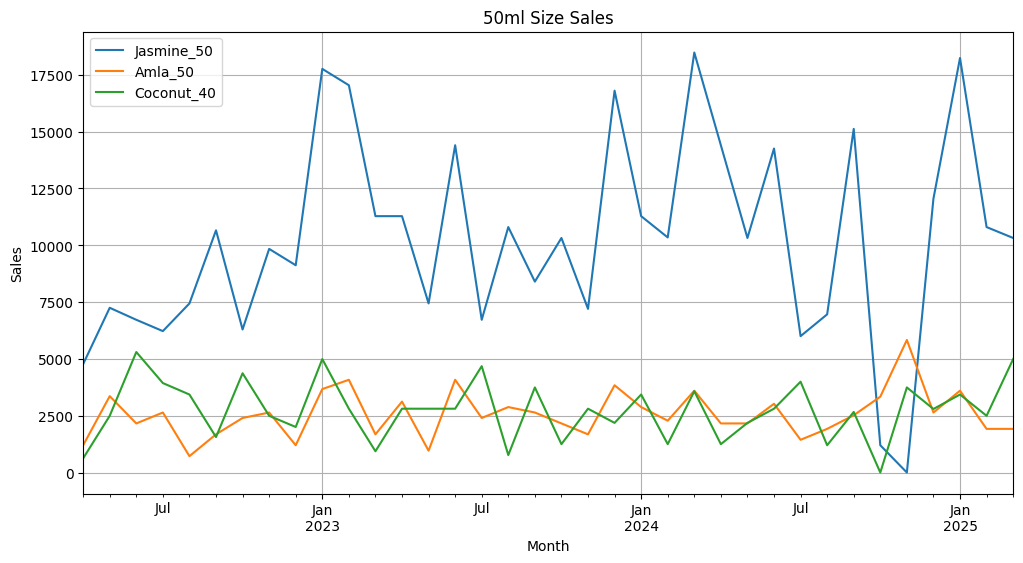

In [132]:
df[['Jasmine_50','Amla_50','Coconut_40']].plot(figsize=(12, 6), title="50ml Size Sales")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

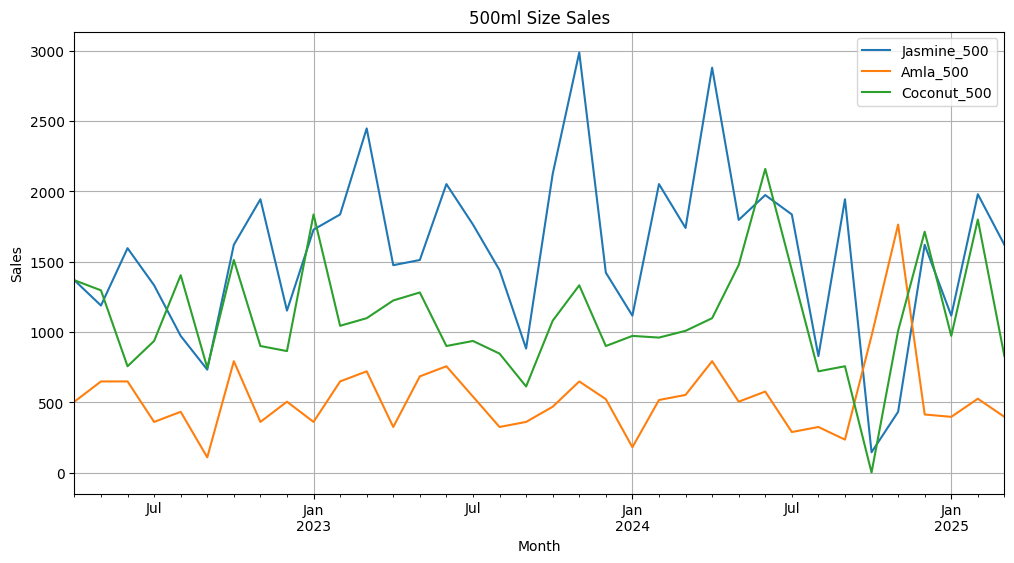

In [133]:
df[['Jasmine_500','Amla_500','Coconut_500']].plot(figsize=(12, 6), title="500ml Size Sales")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

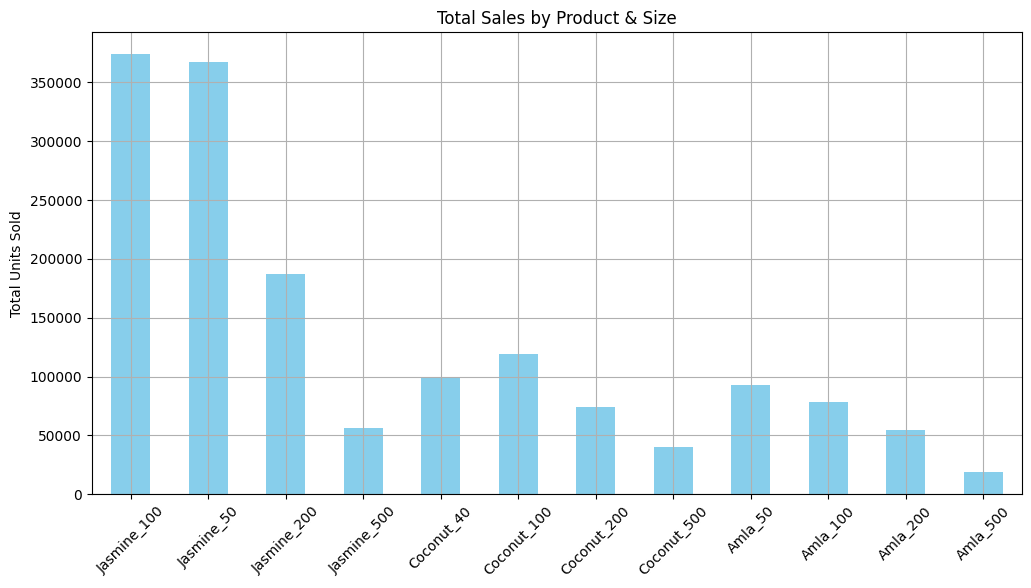

In [134]:
df.sum().plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title("Total Sales by Product & Size")
plt.ylabel("Total Units Sold")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

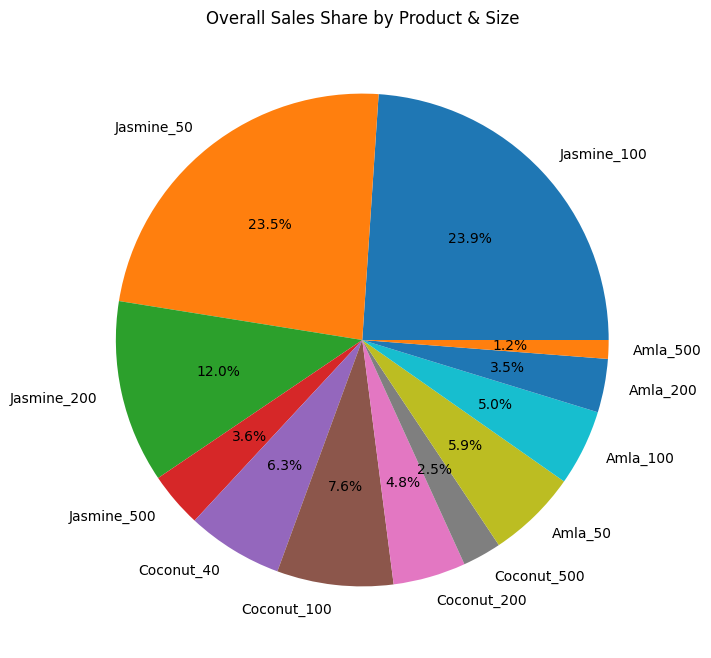

In [135]:
df.sum().plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%')
plt.title("Overall Sales Share by Product & Size")
plt.ylabel('')
plt.show()

In [136]:
df_reset = df.reset_index()  # if Month is index
#Converts the index (Month) into a normal column.
#Required for melting or plotting where Month is used as an actual variable (x-axis in this case).
df_long = df_reset.melt(id_vars='Month', var_name='Product_Size', value_name='Sales')
#Converts DataFrame from wide format (12 product-size columns) to long format, which seaborn expects for grouped plots.

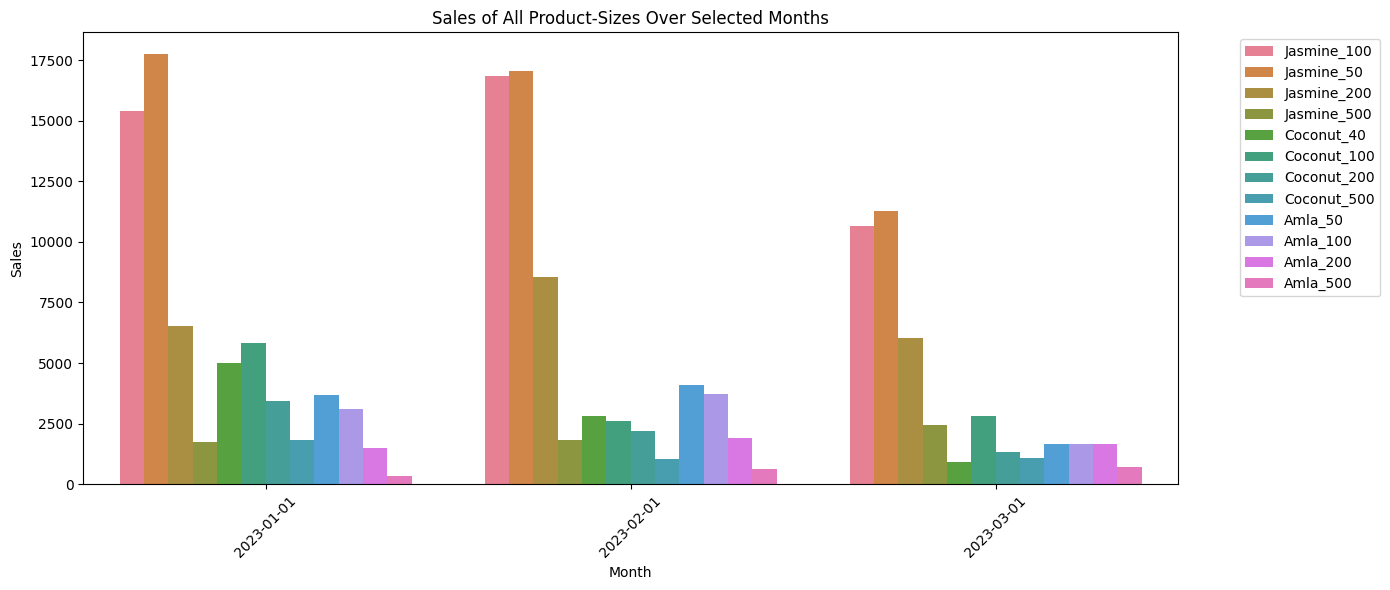

In [137]:
subset = df_long[df_long['Month'].dt.strftime('%b-%Y').isin(['Jan-2023', 'Feb-2023', 'Mar-2023'])]
#Limits the data to only 3 months: Jan, Feb, and Mar 2023.
plt.figure(figsize=(14, 6))
sns.barplot(x='Month', y='Sales', hue='Product_Size', data=subset)
plt.title("Sales of All Product-Sizes Over Selected Months")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [138]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

In [139]:
def create_sequences(data, time_step=3):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i+time_step])
        y.append(data[i+time_step])
    return np.array(X), np.array(y)

X, y = create_sequences(data_scaled, time_step=3)

In [140]:
import tensorflow as tf
from keras.losses import MeanSquaredError

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X.shape[1], X.shape[2]), activation='relu'))
#keras expects input in 3d format (batch_size, timesteps, features) 
#batch_size = how many samples you feed at once (handled automatically during training)
#timesteps = how many past time steps you use to predict the future
#features = how many variables (in your case, 12 product-size sales)
#we are using time steps as 3 and features are 12 therefore x.shape[1]=3,x.shape[2]=12
model.add(LSTM(100))
model.add(Dense(50, activation='relu'))  #adding another dense layer for better modelling
model.add(Dense(12))  # Output layer

from keras.losses import MeanSquaredError

model.compile(optimizer='adam', loss=MeanSquaredError(), metrics=['mae'])
  #mae is used as accuracy for regression problems

model.fit(X, y, epochs=100, validation_split=0.2)

Epoch 1/100


c:\Users\aman tiwari\OneDrive\Desktop\ann classification\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.2846 - mae: 0.4866 - val_loss: 0.3071 - val_mae: 0.4719
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.2786 - mae: 0.4808 - val_loss: 0.3018 - val_mae: 0.4679
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.2731 - mae: 0.4752 - val_loss: 0.2963 - val_mae: 0.4636
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.2677 - mae: 0.4695 - val_loss: 0.2906 - val_mae: 0.4590
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.2617 - mae: 0.4632 - val_loss: 0.2846 - val_mae: 0.4541
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.2552 - mae: 0.4561 - val_loss: 0.2780 - val_mae: 0.4486
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.2480 - mae: 0.4482 - val_loss: 0.2707 - val_mae: 0.4427
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.2400 - mae: 0.4391 - val_loss: 0.2625 - val_mae: 0.4359
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.2312 - mae: 0.4289 - val_l

In [141]:
input_seq = data_scaled[-3:].reshape(1, 3, 12)
predictions = []

for _ in range(12):  # forecast next 12 months
    pred = model.predict(input_seq)[0]
    predictions.append(pred)
    input_seq = np.append(input_seq[:, 1:, :], [[pred]], axis=1)

# Inverse scale
forecast = scaler.inverse_transform(np.array(predictions))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [142]:
import pandas as pd
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')
forecast_df = pd.DataFrame(forecast, columns=df.columns, index=future_dates)

In [143]:
forecast_df

,Jasmine_100,Jasmine_50,Jasmine_200,Jasmine_500,Coconut_40,Coconut_100,Coconut_200,Coconut_500,Amla_50,Amla_100,Amla_200,Amla_500
2025-04-01,11640.488281,11383.049805,5853.602051,1782.077271,2817.191162,3517.317871,2186.537354,1189.960693,2555.972656,2215.397217,1475.900024,510.612488
2025-05-01,10912.224609,10767.974609,5598.187500,1648.264526,2686.134277,3347.915283,2069.599609,1117.379761,2386.624512,2080.078613,1435.452271,473.534943
2025-06-01,10812.315430,10733.789062,5570.736816,1635.246704,2660.964111,3328.964844,2048.890381,1109.084229,2385.968018,2062.351562,1429.681763,474.212097
2025-07-01,11040.522461,10839.807617,5608.467773,1683.927856,2697.407715,3364.744385,2081.252197,1129.017822,2450.477783,2100.389893,1429.880127,489.319397
2025-08-01,10842.848633,10641.164062,5518.202637,1654.720215,2649.288330,3302.078857,2044.971191,1106.635620,2417.770264,2062.051270,1417.277466,483.156189
2025-09-01,10830.544922,10631.925781,5513.007812,1652.618652,2647.173340,3299.248291,2042.834595,1105.557739,2415.255371,2059.513184,1416.352905,482.610596
2025-10-01,10837.989258,10642.699219,5516.979004,1653.315186,2649.576904,3302.753174,2044.117554,1106.695679,2415.763184,2060.702881,1416.747070,482.543091
2025-11-01,10774.649414,10580.025391,5488.250977,1643.809082,2634.395752,3283.076904,2032.504150,1099.618042,2405.067627,2048.361328,1412.634155,480.485229
2025-12-01,10766.614258,10572.202148,5484.384277,1642.605591,2632.333496,3280.462158,2030.942383,1098.711060,2403.717773,2046.691895,1412.073608,480.192322
2026-01-01,10755.565430,10561.315430,5479.101562,1640.958618,2629.519531,3276.908691,2028.794678,1097.468384,2401.865723,2044.434692,1411.312622,479.802673


In [144]:
model.save("lstm_sales_model.h5")


In [145]:
df.to_csv("engineered_dataset.csv")


In [146]:
import joblib
joblib.dump(scaler, "sales_scaler.save")

['sales_scaler.save']